In [47]:
from obspy.clients.fdsn import Client as FDSN_Client
client = FDSN_Client("IRIS")
from obspy import UTCDateTime

In [48]:
#Anak Krakatoa, Indonesia, December 22, 2018; strong Strombolian to weak Vulcanian eruption that sent lava bombs into the water; 453 deaths, 14,059 injured, 33,719 affected, $291,365 adjusted USD
start = UTCDateTime(year = 2018, month = 12, day = 22, hour  = 0, minute = 00, second = 00)
print(start)
end = start + 60*60*24 
print(end)

2018-12-22T00:00:00.000000Z
2018-12-23T00:00:00.000000Z


In [49]:
#Honiara, Solomon Islands
network = 'IU'
station = 'HNR'
channels = 'BH1'
location = '10'

In [50]:
inventory_single = client.get_stations(network=network, station=station, channel=channels, 
                                level='response', location=location, starttime=start, 
                                endtime=end)

In [51]:
vars(inventory_single[0])

{'_stations': [Station HNR (Honiara, Solomon Islands)
	Station Code: HNR
	Channel Count: 1/288 (Selected/Total)
	1993-10-22T00:00:00.000000Z - 
	Access: open 
	Latitude: -9.4387, Longitude: 159.9475, Elevation: 100.0 m
	Available Channels:
	  .10.BH1        40.0 Hz  2018-03-16 to 2020-01-24  Depth 1.0 m
],
 '_total_number_of_stations': 128,
 '_selected_number_of_stations': 1,
 '_operators': [],
 '_code': 'IU',
 'comments': [],
 'description': 'Global Seismograph Network - IRIS/USGS (GSN)',
 'start_date': 1988-01-01T00:00:00.000000Z,
 'end_date': None,
 'restricted_status': 'open',
 '_alternate_code': None,
 '_historical_code': None,
 'data_availability': None,
 '_identifiers': ['DOI:10.7914/SN/IU\n   '],
 '_source_id': None}

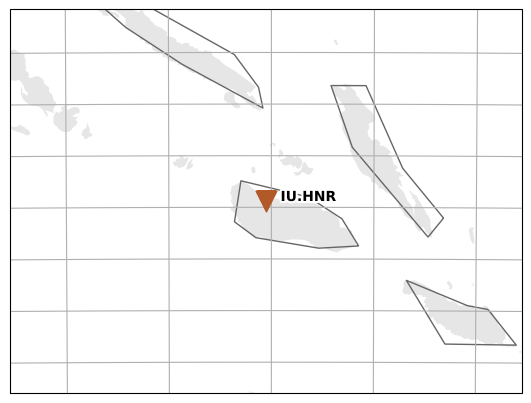

In [52]:
map = inventory_single.plot('local')

In [53]:
sta_lat = inventory_single[0].stations[0].latitude
sta_lon = inventory_single[0].stations[0].longitude
network = inventory_single[0].code
station = inventory_single[0].stations[0].code
location = '10' 
channel = 'BH1'

tstart = start
tend = end

In [56]:
st = client.get_waveforms(network, station, location, channel, tstart, tend)
print(st)

1 Trace(s) in Stream:
IU.HNR.10.BH1 | 2018-12-22T00:00:00.019538Z - 2018-12-22T23:59:59.994538Z | 40.0 Hz, 3456000 samples


"[A] tsunami occurred [...] after large parts of the southwestern side of Anak Krakatoa collapsed onto its caldera [and] was the deadliest volcanic tsunami in recorded history in Indonesia since the 1883 Sunda Strait tsunami, which originated from the same island. [Had] waves up to five meters in height making landfall [and] affected more than 300 kilometers (186 mi) of coastline in Sumatra.

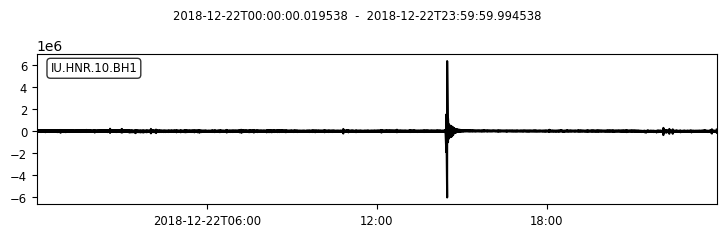

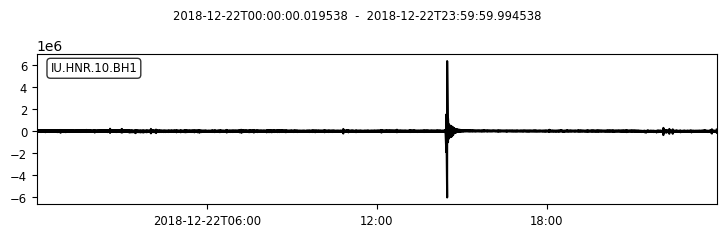

In [57]:
#6.0 magnitude, December 22, 2018, occurred around ten minutes before tsunami
st.plot()

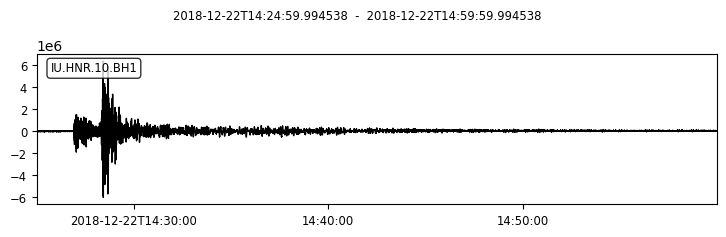

<bound method Figure.show of <Figure size 800x250 with 1 Axes>>

In [58]:
short = st.copy()
short = short.trim(start + 14*60*60 + 25*60, endtime = start + 15*60*60)
short.plot().show

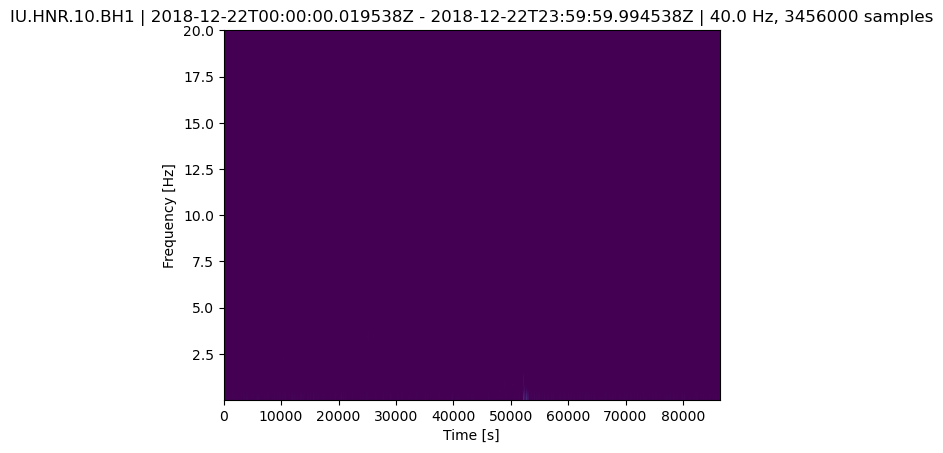

In [59]:
spec = st[0].spectrogram()

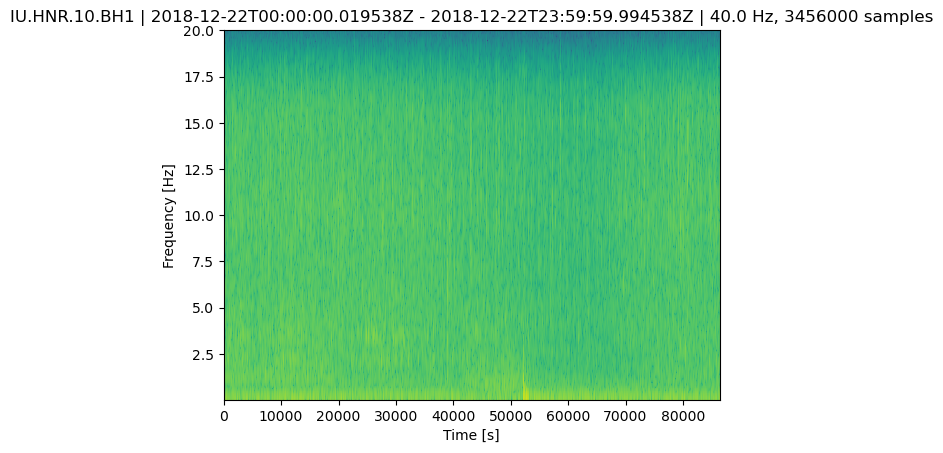

In [60]:
spec = st[0].spectrogram(dbscale=True)

In [64]:
#Kilauea, Hawaii, May 3rd-May 30th, 2018; lava flow; 2500 affected, $582,730 USD adjusted
start = UTCDateTime(year = 2018, month = 5, day = 4, hour  = 0, minute = 00, second = 00)
print(start)
end = start + 60*60*24 
print(end)

#Kaena Point Digital, Hawaii, south of big island
network = 'HV'
station = 'KAED'
channels = 'EHZ'
location = '--'

2018-05-04T00:00:00.000000Z
2018-05-05T00:00:00.000000Z


In [65]:
inventory_single = client.get_stations(network=network, station=station, channel=channels, 
                                level='response', location=location, starttime=start, 
                                endtime=end)

In [66]:
vars(inventory_single[0])

{'_stations': [Station KAED (Kaena Point Digital)
	Station Code: KAED
	Channel Count: 1/1 (Selected/Total)
	2011-05-26T00:00:00.000000Z - 
	Access: open 
	Latitude: 19.2859, Longitude: -155.1291, Elevation: 44.0 m
	Available Channels:
	    ..EHZ       100.0 Hz  2011-05-26 to None
],
 '_total_number_of_stations': 113,
 '_selected_number_of_stations': 1,
 '_operators': [],
 '_code': 'HV',
 'comments': [],
 'description': 'Hawaiian Volcano Observatory Network (HVO)',
 'start_date': 1956-01-01T00:00:00.000000Z,
 'end_date': None,
 'restricted_status': 'open',
 '_alternate_code': None,
 '_historical_code': None,
 'data_availability': None,
 '_identifiers': ['DOI:10.7914/SN/HV\n   '],
 '_source_id': None}

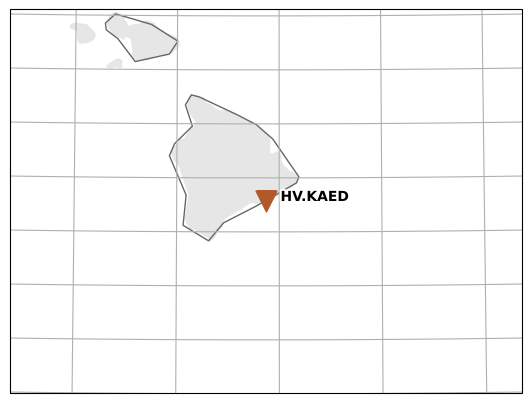

In [17]:
map = inventory_single.plot('local')

In [67]:
sta_lat = inventory_single[0].stations[0].latitude
sta_lon = inventory_single[0].stations[0].longitude
network = inventory_single[0].code
station = inventory_single[0].stations[0].code
location = '--' 
channel = 'EHZ'

tstart = start
tend = end

In [68]:
st = client.get_waveforms(network, station, location, channel, tstart, tend)
print(st)

1 Trace(s) in Stream:
HV.KAED..EHZ | 2018-05-04T00:00:00.005000Z - 2018-05-04T23:59:59.995000Z | 100.0 Hz, 8640000 samples


"The main earthquake was preceded almost exactly an hour earlier by a Mw 5.4 foreshock with a similar epicenter and focal mechanism. Analysis of seismic waveforms suggest that the mainshock was most likely caused by slip on a thrust fault dipping at 20° to the northwest beneath the southeastern flank of the volcano. The mainshock was followed by four aftershocks greater than Mw  4.5 over the next 30 minutes. Smaller aftershock continued to occur for months after the main earthquake."

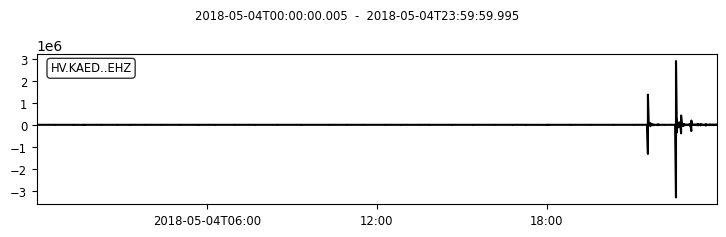

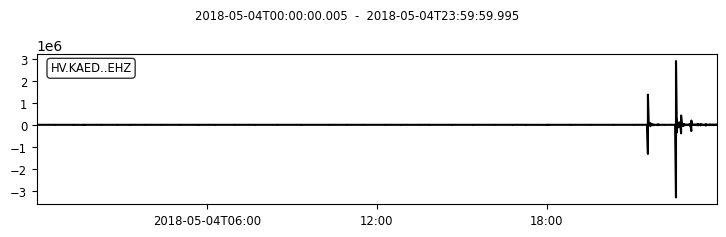

In [69]:
#6.9 magnitude, May 4, 2018, 12:33 p.m. local time
st.plot()

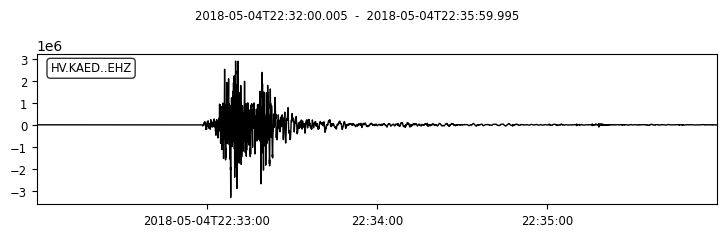

<bound method Figure.show of <Figure size 800x250 with 1 Axes>>

In [71]:
short = st.copy()
short = short.trim(start + 22*60*60 + 32*60, endtime = start + 22*60*60 + 36*60)
short.plot().show

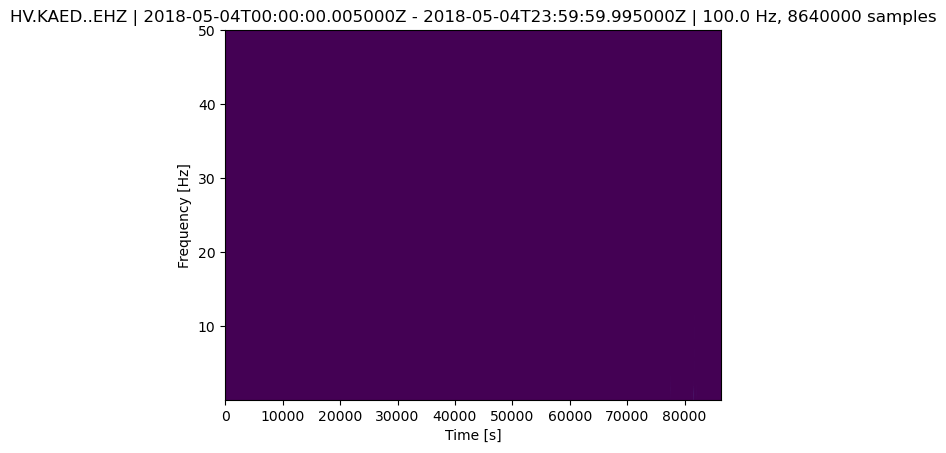

In [72]:
spec = st[0].spectrogram()

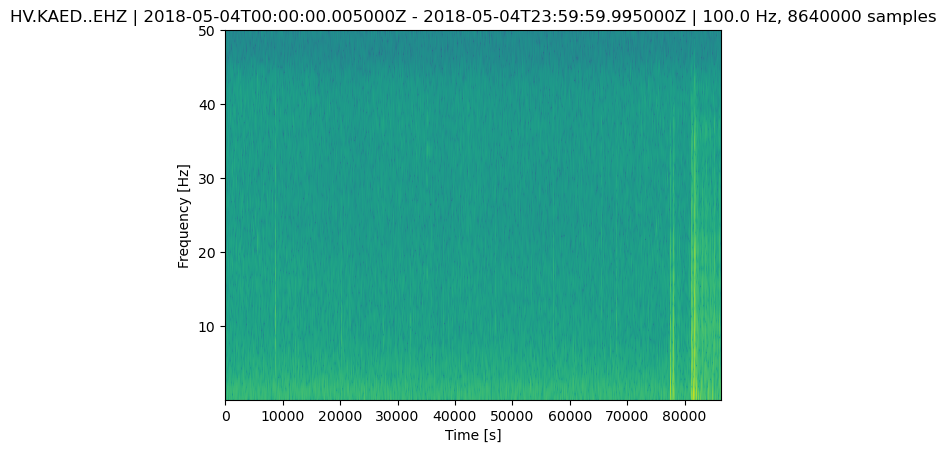

In [74]:
spec = st[0].spectrogram(dbscale=True)